### Limpieza avanzada del documento en limpio


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#para que aparezcan todas las columnas
pd.set_option('display.max_columns', None)

In [21]:
#parse_dates para mantener el formato fecha modificado anteriormente.
#para evitar que se deshaga el cambio, se puede guardar el parquet o pickle en lugar del original csv
datos_bancarios_limpio_o= pd.read_csv('output/bank_additional_limpio.csv', parse_dates=['date'])
datos_bancarios_limpio_o.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
7722,28.0,services,married,high_school,no,no,no,telephone,659,2,999,0,nonexistent,1.4,94.465,-41.8,NaN,5228.1,yes,2015-09-10,43.073,-80.305,d98758fb-5a34-4234-a98c-dcaf86695cd2
9744,30.0,self-employed,single,university_degree,no,no,no,telephone,587,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes,2015-06-05,40.520,-124.785,91331b74-b9f8-48b2-9024-1b17268918fe
25350,32.0,blue-collar,married,high_school,no,yes,no,cellular,104,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no,2017-04-25,26.124,-72.682,afa55f28-9c45-47f3-9a5a-d04ffa3edc2d
17244,NaN,admin,divorced,high_school,no,yes,yes,cellular,52,10,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,2017-06-30,25.189,-94.175,54e4fe41-bb76-455d-bfc4-92c4fafeb7d1
13879,51.0,entrepreneur,divorced,high_school,no,no,no,cellular,347,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,2017-04-18,32.824,-116.298,cd245309-d0c8-4747-947b-7365197afcce


In [22]:
#copia del original 
datos_bancarios_limpio=datos_bancarios_limpio_o.copy()
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
39185,65.0,housemaid,divorced,basic_4y,NaN,no,no,cellular,288,3,999,0,nonexistent,-1.8,93.369,-34.8,NaN,5008.7,yes,2015-05-20,46.235,-81.720,94ef3934-9c66-4812-a72d-3568a2625dc7
6376,31.0,admin,married,high_school,no,no,no,telephone,350,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2016-12-27,37.569,-93.419,b3c1402e-261c-4cf3-8f70-fd62711f7da2
3868,47.0,management,married,basic_4y,NaN,no,no,telephone,268,6,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no,2016-09-24,48.929,-69.865,544b6677-bb92-4095-ac80-7ed716ac0926
34818,59.0,admin,divorced,university_degree,no,no,no,cellular,58,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,no,2019-04-27,38.511,-102.191,e2536f37-03a3-4500-aac7-a698b358bb6d
41564,36.0,admin,single,university_degree,no,yes,no,telephone,521,6,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,yes,2019-07-10,38.150,-123.747,3f3f89b5-2e06-4f57-aa5a-79110b0cc3fe


In [23]:
#comprobamos que la fecha está como tal en type

In [24]:
#mes de la interaccion con cliente

datos_bancarios_limpio['contact_month_num']= datos_bancarios_limpio['date'].dt.month
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num
9296,35.0,blue-collar,divorced,basic_6y,NaN,no,no,telephone,81,2,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,2018-09-25,27.503,-85.761,3502a1f8-d0a4-4fb4-91ac-3a71321f5819,9.0
20014,34.0,technician,married,professional_course,no,no,no,cellular,187,1,999,0,nonexistent,1.4,93.444,-36.1,NaN,5228.1,no,2016-02-10,40.853,-112.009,a3d2d088-3781-44ea-9944-a4a40df51285,2.0
18822,48.0,blue-collar,married,basic_4y,NaN,yes,no,cellular,69,2,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no,2019-04-01,35.354,-80.649,c029ca2f-64f5-4b2d-b697-7164d4913257,4.0
41592,NaN,technician,married,basic_9y,no,yes,no,telephone,215,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2017-06-08,33.050,-103.943,0819d4d7-c116-4374-a27a-b22e8ab7eaee,6.0
17606,39.0,admin,single,university_degree,no,no,no,cellular,60,1,999,0,nonexistent,1.4,93.918,-42.7,NaN,5228.1,no,2018-08-12,32.870,-81.414,17f5f1fd-da34-4225-aeb8-4ca015490932,8.0


In [25]:
#columna mes de la interaccion con cliente en letra
months_en = {
    1: "january",
    2: "february",
    3: "march",
    4: "april",
    5: "may",
    6: "june",
    7: "july",
    8: "august",
    9: "september",
    10: "october",
    11: "november",
    12: "december"
}

In [26]:
datos_bancarios_limpio['contact_month']= datos_bancarios_limpio['contact_month_num'].map(months_en)

In [27]:
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month
7859,40.0,technician,single,professional_course,no,yes,no,telephone,123,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no,2018-02-17,40.321,-89.673,3a57ad44-6aca-43bd-98f2-ec3fd02026cc,2.0,february
5098,38.0,blue-collar,married,basic_4y,no,no,no,telephone,438,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2016-10-21,27.688,-109.188,a3eb3105-b32c-48a6-a2e0-d1278b997211,10.0,october
34048,29.0,services,single,high_school,no,yes,no,cellular,240,3,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no,2017-08-13,36.497,-71.228,72fa396d-0581-4df9-9190-6bc27b52aee9,8.0,august
3409,30.0,admin,single,high_school,no,no,yes,telephone,892,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,yes,2018-04-27,42.988,-93.947,c1773651-fd16-4f19-8fa7-6eb7424c0f8e,4.0,april
11063,55.0,admin,married,high_school,no,yes,no,telephone,178,1,999,0,nonexistent,1.4,94.465,-41.8,NaN,5228.1,no,NaT,43.712,-104.264,b50b8720-4fee-404e-ab35-a6091fc94ec0,NaN,NaN


In [28]:
#año de la interaccion con cliente

datos_bancarios_limpio['contact_year']= datos_bancarios_limpio['date'].dt.year
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month,contact_year
8715,38.0,services,married,high_school,NaN,no,no,telephone,305,5,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no,2019-02-12,47.084,-82.077,7398a760-ba23-44db-81c3-bae70761b7fd,2.0,february,2019.0
41881,24.0,management,single,university_degree,no,yes,no,cellular,91,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,no,2015-10-23,33.335,-77.744,d107ff52-b421-4395-b46f-d2a25f034b00,10.0,october,2015.0
4552,32.0,blue-collar,married,basic_9y,NaN,yes,no,telephone,162,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no,2019-08-18,46.004,-100.376,18af8e80-1265-441d-b779-829b5b19333d,8.0,august,2019.0
11642,NaN,entrepreneur,married,professional_course,no,no,no,telephone,804,12,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,2019-11-08,34.111,-78.296,40b6b1b9-9fda-446c-9953-ba46b7f8a750,11.0,november,2019.0
25271,48.0,self-employed,married,university_degree,no,yes,no,cellular,141,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,2016-03-18,45.117,-98.129,e26d54b1-bd0b-4d72-bfe3-50a3becfe35a,3.0,march,2016.0


In [ ]:
#renombramos y cargamos columnas como contact_month y vontact_year, borramos las anteriores creadas como month_num, year y month
 #datos_bancarios_limpio=datos_bancarios_limpio.drop('month_num', axis=1)

In [ ]:
 #datos_bancarios_limpio=datos_bancarios_limpio.drop('month', axis=1)

In [ ]:
#datos_bancarios_limpio=datos_bancarios_limpio.drop('year', axis=1)

In [31]:
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month,contact_year
40872,NaN,admin,single,university_degree,no,yes,no,cellular,297,5,999,0,nonexistent,-1.1,94.601,-49.5,1.032,4963.6,yes,2018-07-10,38.663,-103.067,68cc2593-bdeb-4d3b-83bf-d6da6cdfc89d,7.0,july,2018.0
21693,53.0,management,married,university_degree,no,no,no,cellular,50,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no,2015-09-19,36.687,-100.678,6e56ba26-1883-4cda-8a91-ca6030652e0e,9.0,september,2015.0
36531,27.0,admin,single,university_degree,no,yes,no,telephone,329,1,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,2015-06-23,41.673,-80.531,63114122-b3e8-476c-8c57-1187b1b5ac8f,6.0,june,2015.0
135,39.0,management,married,university_degree,no,yes,no,telephone,193,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no,2016-01-28,46.600,-101.065,1c6aa6a6-14df-49cb-b790-7367ccf09592,1.0,january,2016.0
13630,42.0,blue-collar,married,basic_9y,no,yes,no,cellular,829,5,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes,2016-07-02,31.730,-92.540,074d51ca-7f69-4b0f-9221-d2d2317eb38b,7.0,july,2016.0


In [32]:
datos_bancarios_limpio.describe().T

,count,mean,min,25%,50%,75%,max,std
age,37880.0,39.977112,17.0,32.0,38.0,47.0,98.0,10.437957
duration,43000.0,257.739279,0.0,102.0,179.0,319.0,4918.0,258.666033
campaign,43000.0,2.567233,1.0,1.0,2.0,3.0,56.0,2.772294
pdays,43000.0,962.330953,0.0,999.0,999.0,999.0,999.0,187.260394
previous,43000.0,0.174023,0.0,0.0,0.0,0.0,7.0,0.497366
emp.var.rate,43000.0,0.077128,-3.4,-1.8,1.1,1.4,1.4,1.573898
cons.price.idx,42529.0,93.574219,92.201,93.075,93.749,93.994,94.767,0.579548
cons.conf.idx,43000.0,-40.509049,-50.8,-42.7,-41.8,-36.4,-26.9,4.637186
euribor3m,33744.0,3.616521,0.634,1.344,4.857,4.961,5.045,1.737117
nr.employed,43000.0,5166.852602,4963.6,5099.1,5191.0,5228.1,5228.1,72.411125


### Rangos de edades, duracion de la llamada, rangos de meses (trimestres, semestres)

In [33]:
#funcion rango edades

def cat_ages(age):
    if age <= 16:
        return '0-16'
    elif 17 <= age <= 24:
        return '17-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'
    elif age>=65:
        return '65+'
    else:
        return np.nan


In [34]:
#insertar creacion columna a partir de la funcion
datos_bancarios_limpio['age_range_cat'] = datos_bancarios_limpio['age'].apply(cat_ages)
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month,contact_year,age_range_cat
916,51.0,entrepreneur,married,university_degree,no,no,no,telephone,98,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no,2018-06-27,33.959,-114.526,0575a77b-75c5-4e2f-bdc5-41f1070ed853,6.0,june,2018.0,45-54
16796,50.0,blue-collar,married,basic_9y,NaN,yes,no,cellular,99,1,999,0,nonexistent,1.4,93.918,-42.7,NaN,5228.1,no,2018-01-20,40.583,-114.964,40fceef2-5b86-4aea-94e6-cd114dca5d84,1.0,january,2018.0,45-54
28080,36.0,blue-collar,married,basic_9y,no,yes,yes,cellular,99,1,999,0,nonexistent,-1.8,93.075,-47.1,NaN,5099.1,no,2018-11-10,48.636,-123.727,afd41a17-6bb5-4694-b2c7-c9b60ca26256,11.0,november,2018.0,35-44
12112,49.0,technician,single,high_school,no,yes,no,telephone,144,1,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1,no,2018-01-19,47.096,-103.889,fd11ac0d-df0f-4110-bc84-b8d9463067f5,1.0,january,2018.0,45-54
15964,33.0,blue-collar,married,basic_6y,no,yes,no,cellular,702,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,2016-11-15,27.649,-78.463,cd37cd8c-3348-4b7e-b0fd-91ddebe3dc15,11.0,november,2016.0,25-34


In [35]:
#para saber si la clasificación  es adecuada o no se reparten bien en categorias
print(datos_bancarios_limpio['age_range_cat'].value_counts())

age_range_cat
25-34    12671
35-44    12377
45-54     7979
55-64     3243
17-24      994
65+        616
Name: count, dtype: int64


In [36]:
#para comprobar si las equivalencias tienen sentido
datos_bancarios_limpio.loc[:,['age','age_range_cat']]

,age,age_range_cat
0,NaN,NaN
1,57.0,55-64
2,37.0,35-44
3,40.0,35-44
4,56.0,55-64
...,...,...
42995,NaN,NaN
42996,34.0,25-34
42997,NaN,NaN
42998,NaN,NaN


funcion duracion llamada. no utilizada al ser poco clara con pocas categorías
````python
def cat_call_duration(seconds):
   if seconds == 0:
        return "Non answered"
    elif 1 <= seconds <= 60:
        return "Short"
    elif 61 <= seconds <= 300:
        return "Medium"
    elif 301 <= seconds <= 1800:
        return "Long"
    else:  # anything above 1800 seconds
        return "Extra long"
        ````

In [37]:
def cat_call_duration(seconds):
    # Convertimos segundos a minutos
    minutes = seconds / 60
    
    if seconds == 0:
        return "0 min - Non answered"
    elif 0 < minutes <= 1:
        return "0-1 min"
    elif 1 < minutes <= 5:
        return "1-5 min"
    elif 5 < minutes <= 15:
        return "5-15 min"
    elif 15 < minutes <= 30:
        return "15-30 min"
    elif 30 < minutes <= 45:
        return "30-45 min"
    elif minutes>=45:
        return "45+ min"
    else:
        return np.nan

In [38]:
# insertar columna a partier de la funcion de llamada

datos_bancarios_limpio['call_range_cat'] = datos_bancarios_limpio['duration'].apply(cat_call_duration)
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month,contact_year,age_range_cat,call_range_cat
12419,34.0,services,married,high_school,no,yes,no,cellular,206,6,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,2016-09-16,41.802,-69.476,6b7c0155-2e1c-46ab-9fd3-5425aaec7e17,9.0,september,2016.0,25-34,1-5 min
24222,54.0,entrepreneur,married,basic_4y,NaN,yes,no,cellular,310,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,2018-01-22,44.268,-104.203,f68a5d3e-f4e9-4acc-a68d-154a6f23d1cb,1.0,january,2018.0,45-54,5-15 min
30523,NaN,blue-collar,married,basic_9y,NaN,yes,no,cellular,39,5,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no,2017-02-03,38.299,-70.304,c9c6cdd8-99c6-4f62-aeb3-4e8828584bf6,2.0,february,2017.0,NaN,0-1 min
27453,NaN,admin,married,basic_4y,no,no,no,cellular,505,7,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no,2018-06-26,46.096,-113.467,036fa4d9-9319-4c39-8a9d-4b42f759866e,6.0,june,2018.0,NaN,5-15 min
5571,47.0,blue-collar,married,basic_4y,NaN,yes,no,telephone,162,2,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191.0,no,2017-09-17,35.508,-90.152,74b86bb4-901c-4f99-a504-e26cc0880ff8,9.0,september,2017.0,45-54,1-5 min


In [39]:
#para saber si la clasificación en minutos es adecuada o no se reparten bien los minutos en categorias, o si hay nulos
print(datos_bancarios_limpio['call_range_cat'].value_counts())

call_range_cat
1-5 min                 26873
5-15 min                10335
0-1 min                  4463
15-30 min                1224
30-45 min                  83
45+ min                    18
0 min - Non answered        4
Name: count, dtype: int64


In [40]:
#para comprobar si las equivalencias tienen sentido
datos_bancarios_limpio.loc[:,['duration','call_range_cat']]

,duration,call_range_cat
0,261,1-5 min
1,149,1-5 min
2,226,1-5 min
3,151,1-5 min
4,307,5-15 min
...,...,...
42995,618,5-15 min
42996,42,0-1 min
42997,391,5-15 min
42998,674,5-15 min


In [41]:
#meses a trimestres

def cat_month_to_quarter(month):
    if 1.0 <= month <= 3.0:
        return 1
    elif 4.0 <= month <= 6.0:
        return 2
    elif 7.0 <= month <= 9.0:
        return 3
    elif 10<=month<=12:
        return 4
    else:
        return np.nan

In [42]:
## insertar columna a partir de la funcion de trimestre

datos_bancarios_limpio['quarter_cat'] = datos_bancarios_limpio['contact_month_num'].apply(cat_month_to_quarter)
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month,contact_year,age_range_cat,call_range_cat,quarter_cat
21375,54.0,housemaid,married,basic_4y,no,yes,no,cellular,133,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,2015-02-28,33.798,-113.556,578af791-fef0-40bf-a8cf-d9bbe4f8da3c,2.0,february,2015.0,45-54,1-5 min,1.0
14939,28.0,blue-collar,single,basic_9y,no,no,no,cellular,302,2,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,2016-09-22,28.008,-106.270,d8614cbb-75f1-4b70-8f35-4ca26cd68b73,9.0,september,2016.0,25-34,5-15 min,3.0
3403,28.0,student,single,basic_9y,NaN,yes,no,telephone,213,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,2017-12-10,38.051,-99.810,d987a20a-67ec-4cd1-bdb5-52ba1787c460,12.0,december,2017.0,25-34,1-5 min,4.0
13814,32.0,blue-collar,married,basic_9y,no,no,yes,telephone,518,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,2017-04-21,31.472,-67.801,362a825b-2c30-4506-8011-4d593ab08659,4.0,april,2017.0,25-34,5-15 min,2.0
39026,50.0,technician,married,university_degree,no,yes,no,cellular,809,1,999,0,nonexistent,-1.8,93.369,-34.8,0.653,5008.7,yes,2019-10-18,46.059,-93.991,23d71ec9-f8b0-4621-b16b-dcf7fd4f927b,10.0,october,2019.0,45-54,5-15 min,4.0


In [43]:
#para comprobar si las equivalencias tienen sentido
datos_bancarios_limpio.loc[:,['contact_month_num','quarter_cat']]

,contact_month_num,quarter_cat
0,8.0,3.0
1,9.0,3.0
2,2.0,1.0
3,11.0,4.0
4,1.0,1.0
...,...,...
42995,10.0,4.0
42996,3.0,1.0
42997,9.0,3.0
42998,9.0,3.0


In [44]:
#meses a semestres

def cat_month_to_semester(month):
     if 1 <= month <= 6:
        return 1
     elif 7<= month<=12:
         return 2
     else:
         return np.nan

In [45]:
## insertar columna a partier dela funcion de semestre

datos_bancarios_limpio['semester_cat'] = datos_bancarios_limpio['contact_month_num'].apply(cat_month_to_semester)
datos_bancarios_limpio.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_,contact_month_num,contact_month,contact_year,age_range_cat,call_range_cat,quarter_cat,semester_cat
9177,45.0,entrepreneur,married,university_degree,NaN,no,no,telephone,13,5,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,2018-10-02,42.885,-72.397,22d6ef91-31ba-4f7f-a063-dbec7ce4ab90,10.0,october,2018.0,45-54,0-1 min,4.0,2.0
29879,23.0,admin,single,university_degree,no,no,no,cellular,314,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,yes,2019-03-18,29.136,-118.910,fc348749-84a7-460f-8b6a-519d42cd9713,3.0,march,2019.0,17-24,5-15 min,1.0,1.0
6001,36.0,blue-collar,single,basic_9y,NaN,no,no,telephone,201,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2019-07-16,33.493,-112.269,a4a3a1ab-903e-4a03-ac44-32d73bf2bfe7,7.0,july,2019.0,35-44,1-5 min,3.0,2.0
34246,24.0,admin,single,professional_course,no,no,no,cellular,210,6,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no,2016-03-26,25.072,-114.675,0c166e4d-7ac0-400e-8157-ca4db3281a11,3.0,march,2016.0,17-24,1-5 min,1.0,1.0
635,49.0,housemaid,married,basic_4y,no,no,no,telephone,283,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2016-10-03,39.038,-123.176,658955bb-b9f1-418a-995c-df1218b8bf29,10.0,october,2016.0,45-54,1-5 min,4.0,2.0


In [46]:
#para comprobar si las equivalencias tienen sentido
datos_bancarios_limpio.loc[:,['contact_month_num','semester_cat']]

,contact_month_num,semester_cat
0,8.0,2.0
1,9.0,2.0
2,2.0,1.0
3,11.0,2.0
4,1.0,1.0
...,...,...
42995,10.0,2.0
42996,3.0,1.0
42997,9.0,2.0
42998,9.0,2.0


In [47]:
#directamente con cut de panda, no incluye los nulos

corte_edades = [0, 16, 25, 35, 45, 55, 65, np.inf]
categorias_edades = ['0-16', '17-24', '25-34', '35-44','45-54', '55-64', '65+']

datos_bancarios_limpio['age_range_cat'] = pd.cut(
    datos_bancarios_limpio['age'], 
    bins=corte_edades, 
    labels=categorias_edades, 
    include_lowest=True)

ejemplos para ortas categorias:

corte_llamadas= [0, 1, 5 , 15, 30, 45]

corte_trimestres=[3,6,9,12]

corte_semestres=[6,12]

### Gestionamos nulos

primero comprobar si esos nulos tienen sentido o no, ejemplo: attrition (hay nulos porque el empleado sigue trabajando), fecha devolución(nulos porque no se han devuelto)

In [48]:
datos_bancarios_limpio.isnull().sum()

age                  5120
job                   345
marital                85
education            1807
default              8981
housing              1026
loan                 1026
contact                 0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx        471
cons.conf.idx           0
euribor3m            9256
nr.employed             0
y                       0
date                  248
latitude                0
longitude               0
id_                     0
contact_month_num     248
contact_month         248
contact_year          248
age_range_cat        5120
call_range_cat          0
quarter_cat           248
semester_cat          248
dtype: int64

In [49]:
#nulos en porcentajes
nulos=round(datos_bancarios_limpio.isnull().mean()*100,2).sort_values(ascending= False)
nulos

euribor3m            21.53
default              20.89
age_range_cat        11.91
age                  11.91
education             4.20
housing               2.39
loan                  2.39
cons.price.idx        1.10
job                   0.80
semester_cat          0.58
date                  0.58
contact_month_num     0.58
contact_year          0.58
contact_month         0.58
quarter_cat           0.58
marital               0.20
previous              0.00
poutcome              0.00
campaign              0.00
duration              0.00
contact               0.00
pdays                 0.00
emp.var.rate          0.00
longitude             0.00
y                     0.00
nr.employed           0.00
cons.conf.idx         0.00
latitude              0.00
id_                   0.00
call_range_cat        0.00
dtype: float64

In [50]:
#filtro para saber cuales tiene nulos
nulos>0

euribor3m             True
default               True
age_range_cat         True
age                   True
education             True
housing               True
loan                  True
cons.price.idx        True
job                   True
semester_cat          True
date                  True
contact_month_num     True
contact_year          True
contact_month         True
quarter_cat           True
marital               True
previous             False
poutcome             False
campaign             False
duration             False
contact              False
pdays                False
emp.var.rate         False
longitude            False
y                    False
nr.employed          False
cons.conf.idx        False
latitude             False
id_                  False
call_range_cat       False
dtype: bool

In [51]:
datos_bancarios_limpio.isnull().any()

age                   True
job                   True
marital               True
education             True
default               True
housing               True
loan                  True
contact              False
duration             False
campaign             False
pdays                False
previous             False
poutcome             False
emp.var.rate         False
cons.price.idx        True
cons.conf.idx        False
euribor3m             True
nr.employed          False
y                    False
date                  True
latitude             False
longitude            False
id_                  False
contact_month_num     True
contact_month         True
contact_year          True
age_range_cat         True
call_range_cat       False
quarter_cat           True
semester_cat          True
dtype: bool

In [52]:
#creamos dataframe de nulos para usar filtros y solo ver las columnas que tienen algún nulo filtrdas de mayor a
datos_bancarios_limpio_nulos= pd.DataFrame(nulos, columns=['perc_nulos'])
datos_bancarios_limpio_nulos

filtro= datos_bancarios_limpio_nulos['perc_nulos']>0
datos_bancarios_limpio_nulos[filtro].round(2).sort_values(by='perc_nulos', ascending= False)

,perc_nulos
euribor3m,21.53
default,20.89
age_range_cat,11.91
age,11.91
education,4.20
housing,2.39
loan,2.39
cons.price.idx,1.10
job,0.80
semester_cat,0.58


### Nulos de columnas categóricas

los mas sencillos de gestionar. dos opciones:

- se sustituyen por la moda (el valor mas repetido).

- se crea nueva categoria si el porcentaje de nulos es muy alto (ej: 70%), si lo sustituyes por moda se esstán inventado los datos. Luego se ve el porcentaje de aparición del valor más repetido(si este destaca frente al resto)

Normalmente:
- +10% de nulos es mucho

- 7%-10% bastantes

- 4%-7% normal

- <4% poco

- <2% practicamente ningún nulo

In [53]:
#columnas con nulos: convertirlo en dataframes, seleccionar que sean objects y convertirlos en columnas otra evz
col_cat_nulos=datos_bancarios_limpio[datos_bancarios_limpio.columns[datos_bancarios_limpio.isnull().any()]].select_dtypes(include='O').columns

In [54]:
for col in col_cat_nulos:
    print(col)

job
marital
education
default
housing
loan
contact_month


In [55]:
#para ver el porcentaje de nulos y la frecuencia de valores

for col in col_cat_nulos:
    print(f'En la columna {col.upper()} los valores nulos son:')
    print(f'{round(datos_bancarios_limpio[col].isnull().sum()/datos_bancarios_limpio.shape[0]*100,2)}%\n') #porcentaje de nulos
    print (f'Para la columna {col.upper()} la frecuencia de valores es:')
    print(round(datos_bancarios_limpio[col].value_counts()/datos_bancarios_limpio.shape[0]*100,2)) #frecuencia
    print('--------------------------')

En la columna JOB los valores nulos son:
0.8%

Para la columna JOB la frecuencia de valores es:
job
admin            25.29
blue-collar      22.45
technician       16.34
services          9.68
management        7.09
retired           4.16
entrepreneur      3.54
self-employed     3.46
housemaid         2.61
unemployed        2.47
student           2.10
Name: count, dtype: float64
--------------------------
En la columna MARITAL los valores nulos son:
0.2%

Para la columna MARITAL la frecuencia de valores es:
marital
married     60.46
single      28.15
divorced    11.19
Name: count, dtype: float64
--------------------------
En la columna EDUCATION los valores nulos son:
4.2%

Para la columna EDUCATION la frecuencia de valores es:
education
university_degree      29.59
high_school            23.08
basic_9y               14.67
professional_course    12.74
basic_4y               10.13
basic_6y                5.55
illiterate              0.04
Name: count, dtype: float64
----------------------

- **job** solo es un 0,8% de nulos,pero casi no hay diferencia de porcentaje entre categorías, creamos nueva categoria unknown. **Cambiado**

- **marital**, poco nulo, married es la mas alta con diferencia. añadimos a la moda: married

- **education**: nivel medio de porcentaje, si se añade a la moda desvía bastante, añadimos nueva categoria: unknown. **Cambiado**

- **default**: muy alto a pesar de que haya una moda muy alta, añadimos categoría unknown. **Cambiado**

- **housing**: porcentaje bajo, diferencia entre categorías baja, añadimos categoria unknown

- **loan**: porcentaje bajo con el 2.3%, diferencia muy alta, añadimos a la moda (no: 82.42%)

- **contact month**: porcentaje muy bajo, pero no diferencia entre porcentaje de valores, categoria unknown

------------
en resultado: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['marital'].fillna('married',inplace=True)

In [56]:
#para job
datos_bancarios_limpio['job'].fillna('unknown',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\352784624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['job'].fillna('unknown',inplace=True)


In [57]:
#para marital: cambiamos por la moda married
datos_bancarios_limpio['marital'].fillna('married',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\1496309560.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['marital'].fillna('married',inplace=True)


In [58]:
#para education
datos_bancarios_limpio['education'].fillna('unknown',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\232113226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['education'].fillna('unknown',inplace=True)


In [59]:
#para default
datos_bancarios_limpio['default'].fillna('unknown',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\2159069179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['default'].fillna('unknown',inplace=True)


In [60]:
#para housing
datos_bancarios_limpio['housing'].fillna('unknown',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\3665185988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['housing'].fillna('unknown',inplace=True)


In [61]:
#para loan
datos_bancarios_limpio['loan'].fillna('no',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\3587763347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['loan'].fillna('no',inplace=True)


In [62]:
#para contact month
datos_bancarios_limpio['contact_month'].fillna('unknown',inplace=True)

C:\Users\Gordon\AppData\Local\Temp\ipykernel_12436\2717857231.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_bancarios_limpio['contact_month'].fillna('unknown',inplace=True)


In [63]:
#comprobamos que se ha sustituido el nulo
nulos=round(datos_bancarios_limpio.isnull().mean()*100,2).sort_values(ascending= False)

In [64]:
#comprobamos que se ha sustituido el nulo
datos_bancarios_limpio_nulos= pd.DataFrame(nulos, columns=['perc_nulos'])
datos_bancarios_limpio_nulos

filtro= datos_bancarios_limpio_nulos['perc_nulos']>0
datos_bancarios_limpio_nulos[filtro].round(2).sort_values(by='perc_nulos', ascending= False)

,perc_nulos
euribor3m,21.53
age,11.91
age_range_cat,11.91
cons.price.idx,1.10
date,0.58
contact_year,0.58
semester_cat,0.58
contact_month_num,0.58
quarter_cat,0.58


## Nulos en numericos

Los que son numeros pueden sustituirse por la media o mediana o hacer metodos estadisticos avanzados.

Si no hay outliers y hay pocos nulos: media o mediana.
Si los hay: metodos avanzados. Se detectan facilmente mediante gráficos para no usar grado intercuartilico: importar seaborn.

In [65]:
nulos=round(datos_bancarios_limpio.isnull().mean()*100,2).sort_values(ascending= False)

datos_bancarios_limpio_nulos= pd.DataFrame(nulos, columns=['perc_nulos'])
filtro= datos_bancarios_limpio_nulos['perc_nulos']>0
datos_bancarios_limpio_nulos[filtro].round(2).sort_values(by='perc_nulos', ascending= False)

,perc_nulos
euribor3m,21.53
age,11.91
age_range_cat,11.91
cons.price.idx,1.10
date,0.58
contact_year,0.58
semester_cat,0.58
contact_month_num,0.58
quarter_cat,0.58


date no tiene sentido realizar calculos al ser una fecha:

si se aplica un unknown da resultado object: datos_bancarios_limpio['date'].fillna('unknown',inplace=True), perdemos el formato fecha

dejamos fecha con los nulos, ya que no puede cambiarse por nulos y sustituir por fechas  aleatorias antiguas, por medias, minimos o maximos desviaria los datos

para date, mejor dejar los nulos que cambiarlo, ya que con unknown se convierte a string y solo admite una fecha ficticia que desviaría el resto de los datos

por tanto, permanecen como unknown semestre, mes, etc como categoria tambien

In [66]:
datos_bancarios_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                43000 non-null  object        
 2   marital            43000 non-null  object        
 3   education          43000 non-null  object        
 4   default            43000 non-null  object        
 5   housing            43000 non-null  object        
 6   loan               43000 non-null  object        
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp.var.rate       43000 non-null  float64       
 14  cons.p

In [67]:
nulos=round(datos_bancarios_limpio.isnull().mean()*100,2).sort_values(ascending= False)

datos_bancarios_limpio_nulos= pd.DataFrame(nulos, columns=['perc_nulos'])
filtro= datos_bancarios_limpio_nulos['perc_nulos']>0
datos_bancarios_limpio_nulos[filtro].round(2).sort_values(by='perc_nulos', ascending= False)

,perc_nulos
euribor3m,21.53
age,11.91
age_range_cat,11.91
cons.price.idx,1.10
date,0.58
contact_year,0.58
semester_cat,0.58
contact_month_num,0.58
quarter_cat,0.58


In [68]:
#columnas numericas con nulos
datos_bancarios_limpio[datos_bancarios_limpio.columns[datos_bancarios_limpio.isnull().any()]].select_dtypes(include=np.number).columns

Index(['age', 'cons.price.idx', 'euribor3m', 'contact_month_num',
       'contact_year', 'quarter_cat', 'semester_cat'],
      dtype='object')

<Axes: xlabel='euribor3m'>

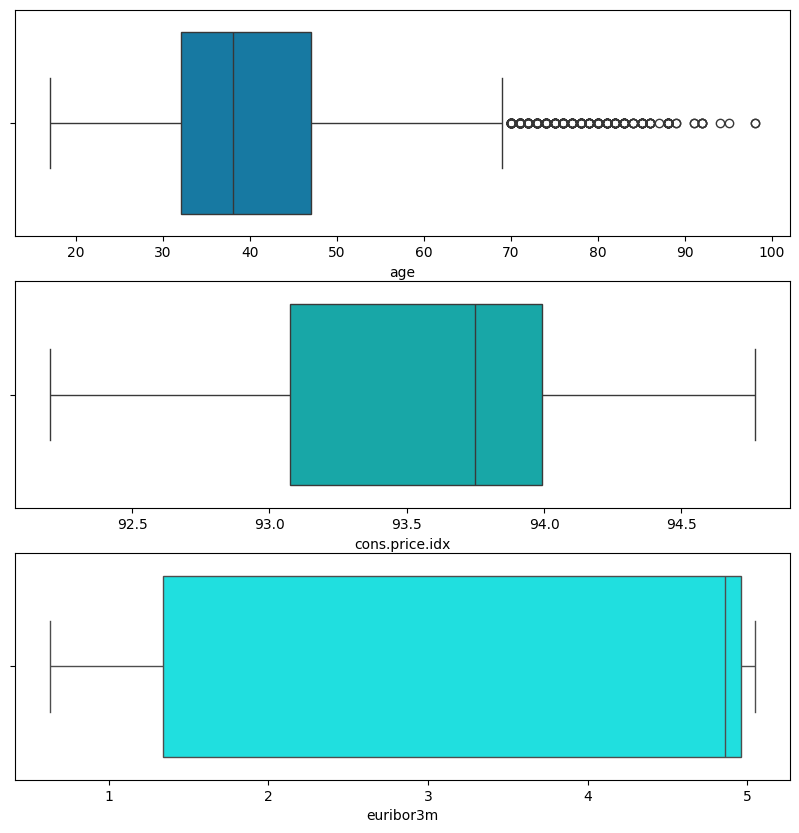

In [69]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 10))

sns.boxplot(x = "age", data = datos_bancarios_limpio, ax = axes[0], legend = False, color = '#0082B9')
sns.boxplot(x = "cons.price.idx", data = datos_bancarios_limpio, ax = axes[1], legend = False, color = 'c')
sns.boxplot(x = "euribor3m", data = datos_bancarios_limpio, ax = axes[2], legend = False, color = 'aqua')

Hay outliers en edad: metodo avanzado. (ver proyecto python)

pero no en cons.price.idx ni en euribor3m, por lo que podemos usar la moda o media

comparamos la media y la mediana

In [70]:
datos_bancarios_limpio[['age', 'cons.price.idx', 'euribor3m']].describe().T[['mean', 'std', '50%']]

,mean,std,50%
age,39.977112,10.437957,38.000
cons.price.idx,93.574219,0.579548,93.749
euribor3m,3.616521,1.737117,4.857


In [71]:
media_cons_price=datos_bancarios_limpio['cons.price.idx'].mean()
mediana_cons_price=datos_bancarios_limpio['cons.price.idx'].median()

In [72]:
df_cons_price= datos_bancarios_limpio['cons.price.idx'].reset_index()
df_cons_price['cons_price_media']=datos_bancarios_limpio['cons.price.idx'].fillna(media_cons_price)
df_cons_price['cons_price_mediana']=datos_bancarios_limpio['cons.price.idx'].fillna(mediana_cons_price)

In [73]:
df_cons_price.sample(5)

,index,cons.price.idx,cons_price_media,cons_price_mediana
11490,11490,94.465,94.465000,94.465
30470,30470,NaN,93.574219,93.749
24885,24885,93.200,93.200000,93.200
39627,39627,94.055,94.055000,94.055
26886,26886,93.200,93.200000,93.200


In [74]:
#en el general no sale ningun nulo, filtramos para que solo salgan nulos para comprobar las columnas
df_nan = df_cons_price[df_cons_price["cons.price.idx"].isna()]
df_nan.sample(5)

,index,cons.price.idx,cons_price_media,cons_price_mediana
22466,22466,NaN,93.574219,93.749
31462,31462,NaN,93.574219,93.749
35444,35444,NaN,93.574219,93.749
1085,1085,NaN,93.574219,93.749
41439,41439,NaN,93.574219,93.749


In [75]:
#se calcula el error de la media:

print(df_cons_price['cons_price_media'].std())

0.5763653968490053


In [76]:
#se calcula el error de la mediana:

print(df_cons_price['cons_price_mediana'].std())

0.5766524288921129


In [77]:
#escogemos el que tenga menor error para sustituir, en este caso la media
datos_bancarios_limpio['cons.price.idx']=datos_bancarios_limpio['cons.price.idx'].fillna(media_cons_price)

In [78]:
#comprobamos si se ha quitado el nulo

nulos=round(datos_bancarios_limpio.isnull().mean()*100,2).sort_values(ascending= False)

datos_bancarios_limpio_nulos= pd.DataFrame(nulos, columns=['perc_nulos'])
filtro= datos_bancarios_limpio_nulos['perc_nulos']>0
datos_bancarios_limpio_nulos[filtro].round(2).sort_values(by='perc_nulos', ascending= False)

,perc_nulos
euribor3m,21.53
age,11.91
age_range_cat,11.91
contact_month_num,0.58
date,0.58
contact_year,0.58
quarter_cat,0.58
semester_cat,0.58


## Euribor

In [79]:
media_euribor=datos_bancarios_limpio['euribor3m'].mean()
mediana_euribor=datos_bancarios_limpio['euribor3m'].median()

In [80]:
df_euribor= datos_bancarios_limpio['euribor3m'].reset_index()
df_euribor['euribor_media']=datos_bancarios_limpio['euribor3m'].fillna(media_euribor)
df_euribor['euribor_mediana']=datos_bancarios_limpio['euribor3m'].fillna(mediana_euribor)

In [81]:
df_euribor.sample(5)

,index,euribor3m,euribor_media,euribor_mediana
7838,7838,4.865,4.865000,4.865
26203,26203,4.076,4.076000,4.076
41285,41285,NaN,3.616521,4.857
34603,34603,1.266,1.266000,1.266
36416,36416,1.260,1.260000,1.260


In [82]:
#se calcula el error de la media:

print(df_euribor['euribor_media'].std())

1.538834049469671


In [83]:
#se calcula el error de la mediana:
print(df_euribor['euribor_mediana'].std())

1.6210951946205312


In [84]:
#escogemos el que tenga menor error para sustituir, en este caso la media
datos_bancarios_limpio['euribor3m']=datos_bancarios_limpio['euribor3m'].fillna(media_euribor)

In [85]:
#funcion para evitar repetirlo a futuro
def nulos_num(df, col_num):
    media= df[col_num].mean()
    mediana=df[col_num].median()
    df_nul_num= df[col_num].reser_index()
    df_nul_num[f'{col_num}_media'] = df[col_num].fillna(media)
    df_nul_num[f'{col_num}_mediana'] = df[col_num].fillna(mediana)
    print(df_nul_num[f'{col_num}_media'].std())
    print(df_nul_num[f'{col_num}_mediana'].std())

In [86]:
#comprobamos si se ha quitado el nulo

nulos=round(datos_bancarios_limpio.isnull().mean()*100,2).sort_values(ascending= False)

datos_bancarios_limpio_nulos= pd.DataFrame(nulos, columns=['perc_nulos'])
filtro= datos_bancarios_limpio_nulos['perc_nulos']>0
datos_bancarios_limpio_nulos[filtro].round(2).sort_values(by='perc_nulos', ascending= False)

,perc_nulos
age,11.91
age_range_cat,11.91
quarter_cat,0.58
contact_month_num,0.58
date,0.58
contact_year,0.58
semester_cat,0.58


## Edad

In [87]:
datos_bancarios_limpio['age'].describe().T


count    37880.000000
mean        39.977112
std         10.437957
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

In [88]:
#calculamos el rango intercuartílico
Q1 = datos_bancarios_limpio['age'].quantile(0.25)
Q3 = datos_bancarios_limpio['age'].quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los valores que no son outliers
age_filtrado = datos_bancarios_limpio[(datos_bancarios_limpio['age'] >= lower_bound) & (datos_bancarios_limpio['age'] <= upper_bound)]


In [89]:
# Media sin outliers
media_sin_outliers= age_filtrado['age'].mean()
print(media_sin_outliers)


39.54122706268864


In [90]:
# Sustituimos nulos usando mediana sin outliers
datos_bancarios_limpio['age'] = datos_bancarios_limpio['age'].fillna(media_sin_outliers)

In [103]:
#aplicamos cambios en categoria de rango de edades al haber resulto los nulos de edades
datos_bancarios_limpio['age_range_cat'] = datos_bancarios_limpio['age'].apply(cat_ages)

In [104]:
datos_bancarios_limpio.isnull().sum()

age                    0
job                    0
marital                0
education              0
default                0
housing                0
loan                   0
contact                0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
emp.var.rate           0
cons.price.idx         0
cons.conf.idx          0
euribor3m              0
nr.employed            0
y                      0
date                 248
latitude               0
longitude              0
id_                    0
contact_month_num    248
contact_month          0
contact_year         248
age_range_cat          0
call_range_cat         0
quarter_cat          248
semester_cat         248
dtype: int64

In [105]:
print(datos_bancarios_limpio.dtypes)

age                           int64
job                          object
marital                      object
education                    object
default                      object
housing                      object
loan                         object
contact                      object
duration                      int64
campaign                      int64
pdays                         int64
previous                      int64
poutcome                     object
emp.var.rate                float64
cons.price.idx              float64
cons.conf.idx               float64
euribor3m                   float64
nr.employed                 float64
y                            object
date                 datetime64[ns]
latitude                    float64
longitude                   float64
id_                          object
contact_month_num           float64
contact_month                object
contact_year                float64
age_range_cat                object
call_range_cat              

In [106]:
datos_bancarios_limpio['age'] = datos_bancarios_limpio['age'].astype(int)

Solo queda fecha y sus derivados con nulos, mejor no sustituirlo al ser más perjudicial hacerlo que mantener los nulos. al no poder modificar fecha, no podemos extraer el mes de contacto, triemtre ni semestre

In [107]:
#importado para poder guardar en C
import os

In [108]:
#codigo para para poder crear el documento en C
os.makedirs("output", exist_ok=True)
datos_bancarios_limpio.to_csv("output/bank-additional_limpio_sin_nulos.csv", index=False)